In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the dataset
ds = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
ds.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
ds.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


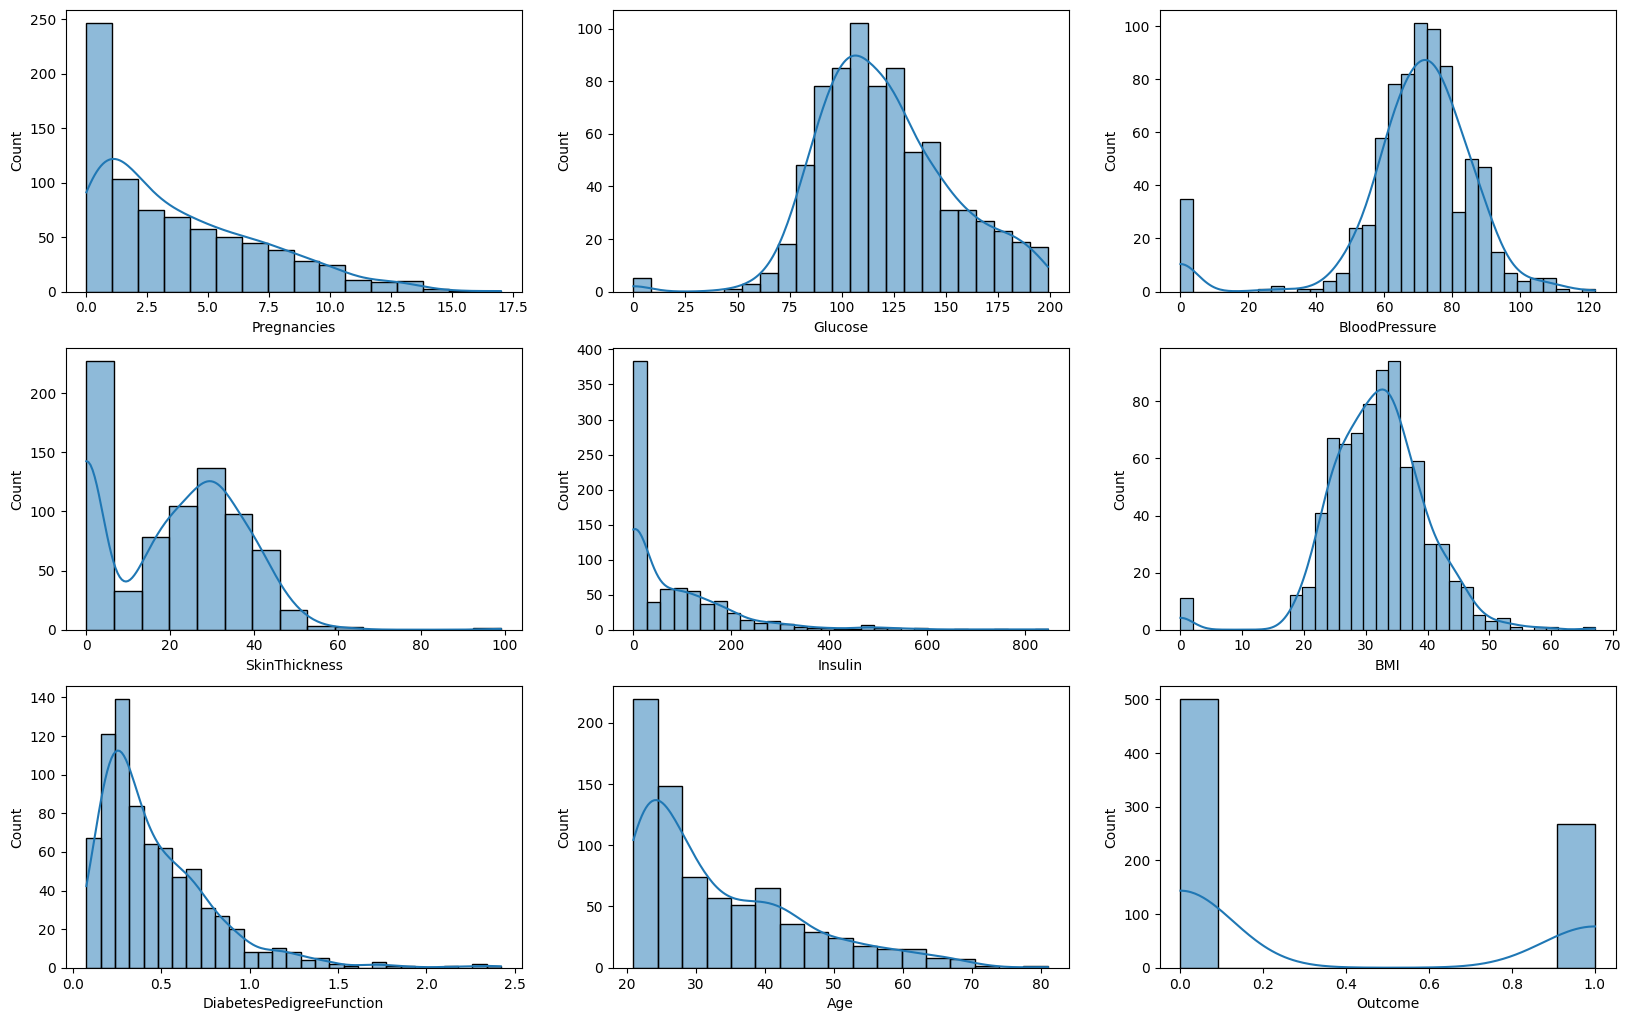

In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(ds.columns):
    plt.subplot(7, 3, i + 1)
    sns.histplot(data=ds, x=col, kde=True)


In [ ]:
ds['Insulin'].value_counts()

,count
Insulin,
0,374
105,11
130,9
140,9
120,8
...,...
73,1
171,1
255,1


In [ ]:
# checking number of zeros in glucose
(ds['Glucose'] == 0).sum()

5

In [ ]:
ds['BloodPressure'].value_counts()    #there are 35 zeros in Blood Pressure

,count
BloodPressure,
70,57
74,52
78,45
68,45
72,44
64,43
80,40
76,39
60,37


In [ ]:

# Display the number of zero values in each column

for column in ds.columns:
  print(f'{column}: {(ds[column] == 0).sum()}')


Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
# replacing glucose, blood pressure, skin thickness, insulin, BMI zero values with median store in ds2

# Calculate the median for columns with zero values
glucose_median = ds['Glucose'].median()
bloodpressure_median = ds['BloodPressure'].median()
skinthickness_median = ds['SkinThickness'].median()
insulin_median = ds['Insulin'].median()
BMI_median = ds['BMI'].median()

# Create a copy of the dataframe
ds2 = ds.copy()

# Replace zero values with the median
ds2['Glucose'] = ds2['Glucose'].replace(0, glucose_median)
ds2['BloodPressure'] = ds2['BloodPressure'].replace(0, bloodpressure_median)
ds2['SkinThickness'] = ds2['SkinThickness'].replace(0, skinthickness_median)
ds2['Insulin'] = ds2['Insulin'].replace(0, insulin_median)
ds2['BMI'] = ds2['BMI'].replace(0, BMI_median)


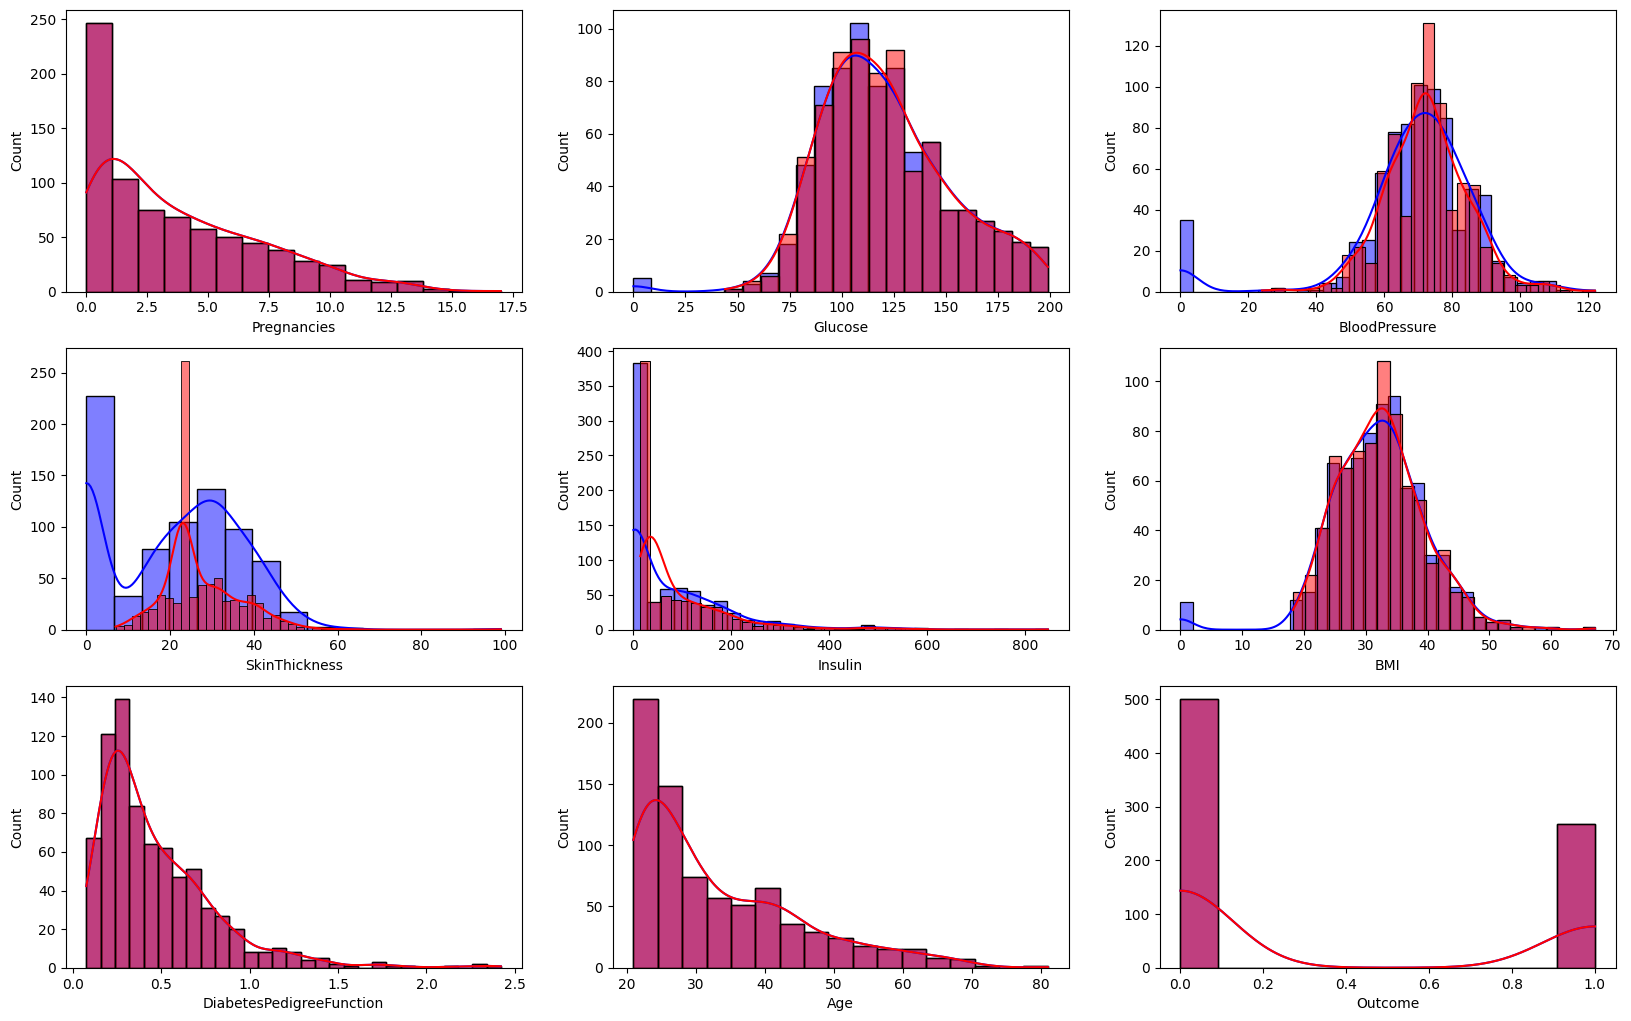

In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(ds.columns):
    plt.subplot(7, 3, i + 1)
    sns.histplot(data=ds, x=col, kde=True, color='blue')
    sns.histplot(data=ds2, x=col, kde=True, color='red')

In [ ]:
# replacing glucose, blood pressure, skin thickness, insulin, BMI zero values with mean store in ds3

# Calculate the mean for columns with zero values
glucose_mean = ds['Glucose'].mean()
bloodpressure_mean = ds['BloodPressure'].mean()
skinthickness_mean = ds['SkinThickness'].mean()
insulin_mean = ds['Insulin'].mean()
BMI_mean = ds['BMI'].mean()

# Create a copy of the dataframe
ds3 = ds.copy()

# Replace zero values with the mean
ds3['Glucose'] = ds3['Glucose'].replace(0, glucose_mean)
ds3['BloodPressure'] = ds3['BloodPressure'].replace(0, bloodpressure_mean)
ds3['SkinThickness'] = ds3['SkinThickness'].replace(0, skinthickness_mean)
ds3['Insulin'] = ds3['Insulin'].replace(0, insulin_mean)
ds3['BMI'] = ds3['BMI'].replace(0, BMI_mean)


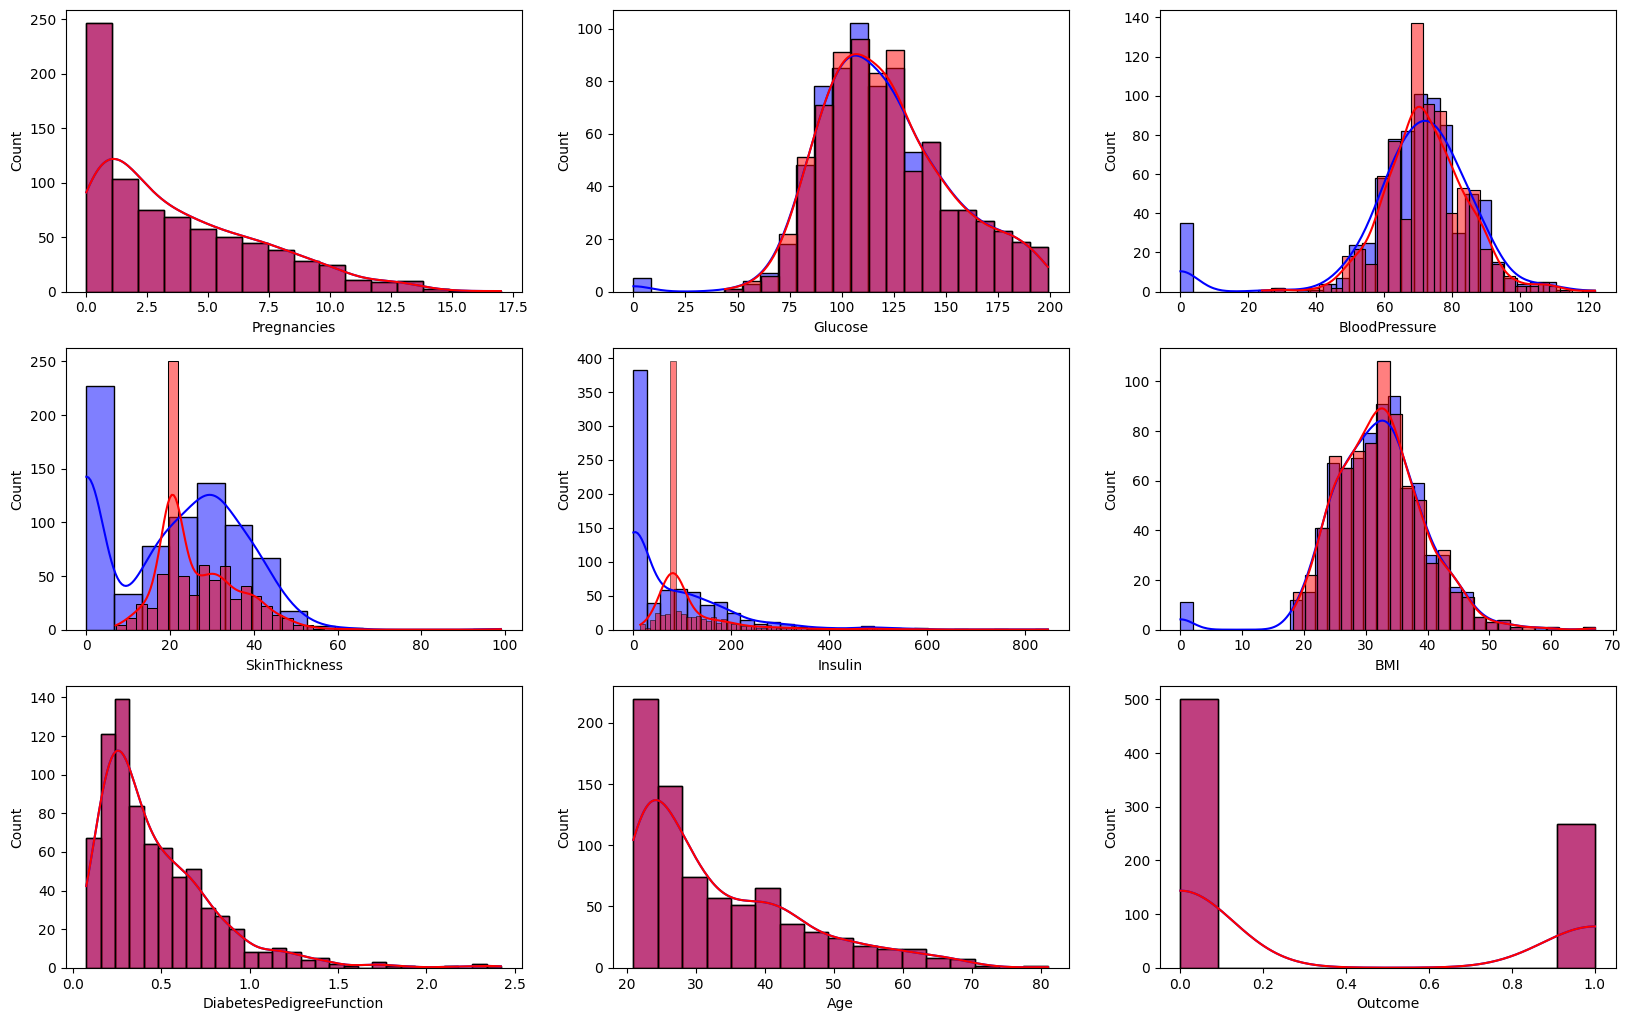

In [ ]:
plt.figure(figsize=(20, 30))
for i, col in enumerate(ds.columns):
    plt.subplot(7, 3, i + 1)
    sns.histplot(data=ds, x=col, kde=True, color='blue')
    sns.histplot(data=ds3, x=col, kde=True, color='red')

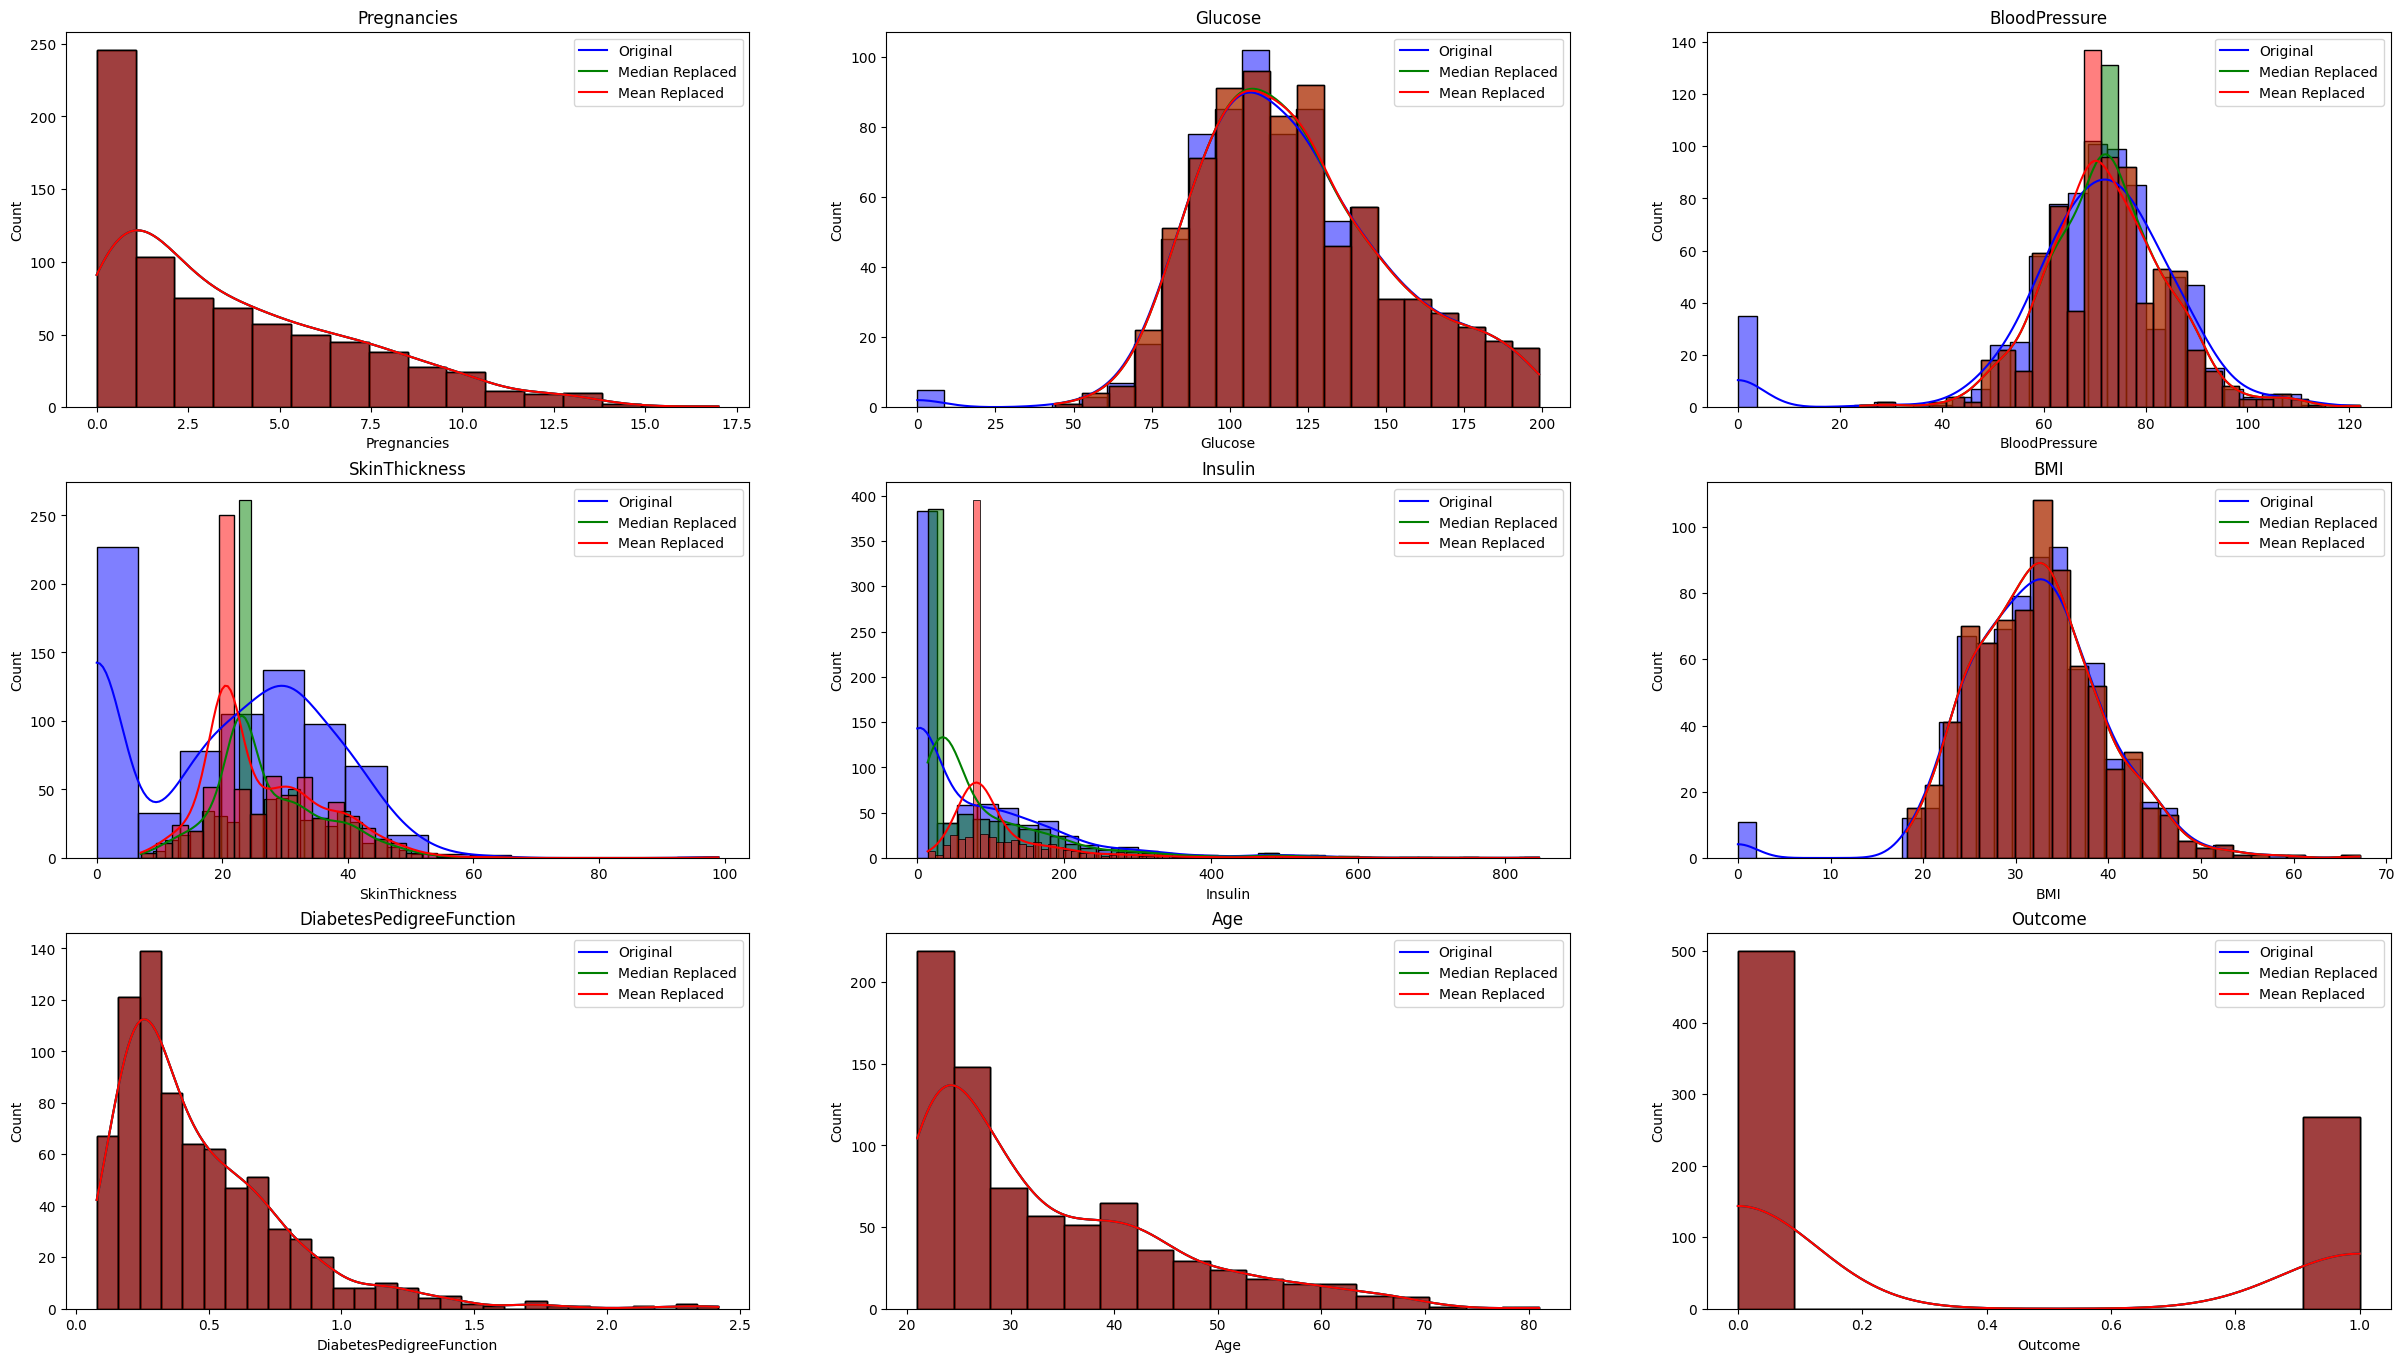

In [ ]:
plt.figure(figsize=(30, 40))
for i, col in enumerate(ds.columns):
    plt.subplot(7, 3, i + 1)
    sns.histplot(data=ds, x=col, kde=True, color='blue')
    sns.histplot(data=ds2, x=col, kde=True, color='green')
    sns.histplot(data=ds3, x=col, kde=True, color='red')
    plt.title(col)
    plt.legend(['Original', 'Median Replaced', 'Mean Replaced'])

In [ ]:
# Create a copy of ds2 (glucose, blood pressure, BMI median dataset)
ds_new = ds2.copy()



In [ ]:
ds_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


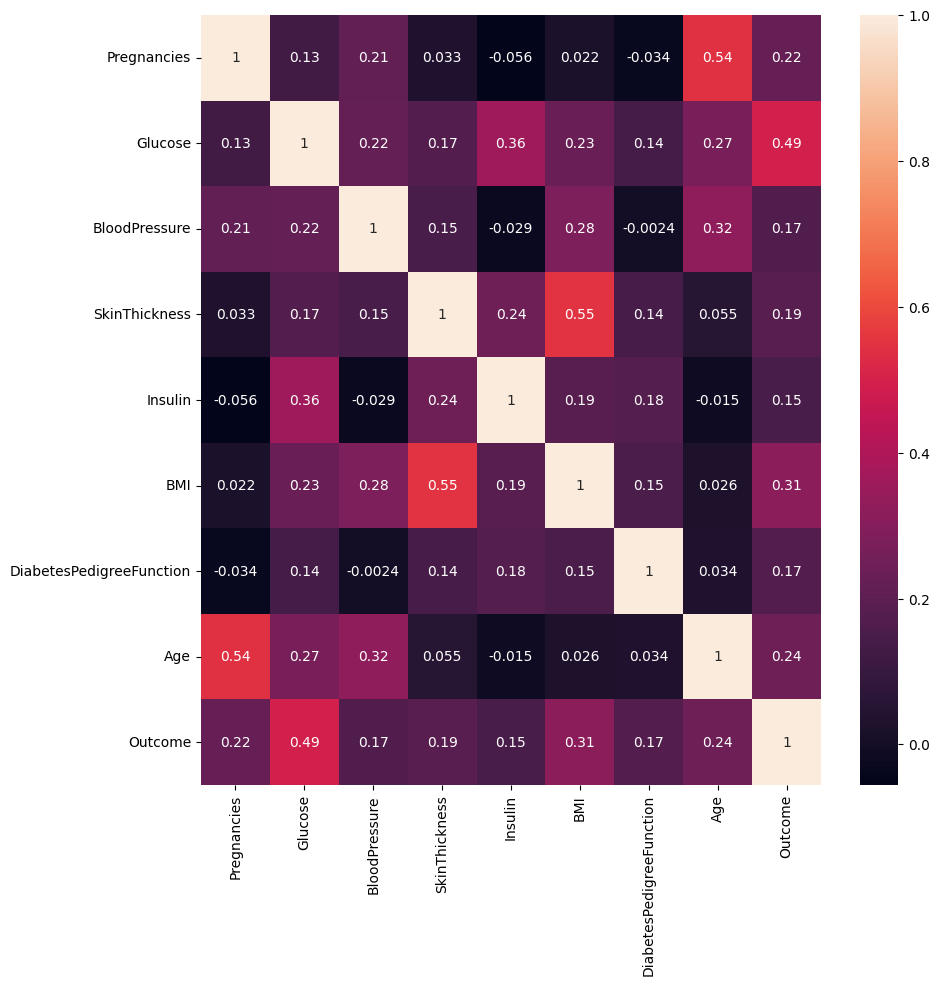

In [ ]:
cor = ds_new.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(cor, annot=True)
plt.show()


In [ ]:
# deriving new feature from BMI
def bmi_category(BMI):
    if BMI < 18.5:
        return 'Underweight'
    elif 18.5 <= BMI < 24.9:
        return 'Normal weight'
    elif 25 <= BMI < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

ds_new['BMI_Category'] = ds_new['BMI'].apply(bmi_category)

In [ ]:
ds_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148,72,35,30.5,33.6,0.627,50,1,Obesity
1,1,85,66,29,30.5,26.6,0.351,31,0,Overweight
2,8,183,64,23,30.5,23.3,0.672,32,1,Normal weight
3,1,89,66,23,94.0,28.1,0.167,21,0,Overweight
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity


In [ ]:
def age_group(Age):
    if Age < 30:
        return 'Youth'
    elif 30 <= Age < 50:
        return 'Adult'
    else:
        return 'Senior'

ds_new['Age_Group'] = ds_new['Age'].apply(age_group)

In [ ]:
ds_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   BMI_Category              768 non-null    object 
 10  Age_Group                 768 non-null    object 
 11  BP_to_BMI_Ratio           768 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 72.1+ KB


In [ ]:
ds_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group
0,6,148,72,35,30.5,33.6,0.627,50,1,Obesity,Senior
1,1,85,66,29,30.5,26.6,0.351,31,0,Overweight,Adult
2,8,183,64,23,30.5,23.3,0.672,32,1,Normal weight,Adult
3,1,89,66,23,94.0,28.1,0.167,21,0,Overweight,Youth
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity,Adult


In [ ]:
ds_new['BP_to_BMI_Ratio'] = ds_new['BloodPressure'] / ds_new['BMI']

In [ ]:
ds_new['BP_to_BMI_Ratio'].describe()

,BP_to_BMI_Ratio
count,768.000000
mean,2.310493
std,0.551239
min,0.545455
25%,1.934642
50%,2.250000
75%,2.610368
max,5.446429


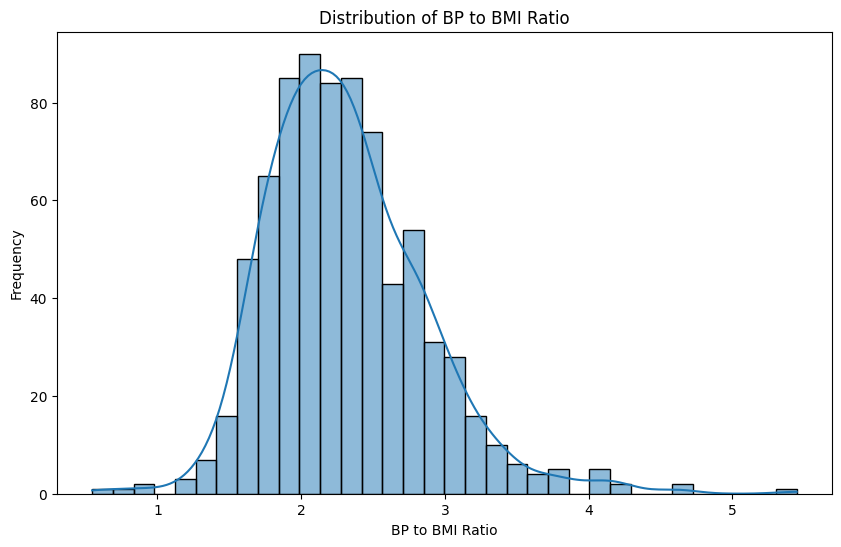

In [ ]:
#graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=ds_new, x='BP_to_BMI_Ratio', kde=True)
plt.title('Distribution of BP to BMI Ratio')
plt.xlabel('BP to BMI Ratio')
plt.ylabel('Frequency')
plt.show()


In [ ]:
ds_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,BP_to_BMI_Ratio
0,6,148,72,35,30.5,33.6,0.627,50,1,Obesity,Senior,2.142857
1,1,85,66,29,30.5,26.6,0.351,31,0,Overweight,Adult,2.481203
2,8,183,64,23,30.5,23.3,0.672,32,1,Normal weight,Adult,2.746781
3,1,89,66,23,94.0,28.1,0.167,21,0,Overweight,Youth,2.348754
4,0,137,40,35,168.0,43.1,2.288,33,1,Obesity,Adult,0.928074


In [ ]:
ds_new['BMI_Category'].value_counts()

,count
BMI_Category,
Obesity,489
Overweight,174
Normal weight,101
Underweight,4


In [ ]:
ds_new.groupby(['BMI_Category', 'Outcome']).size()

BMI_Category   Outcome
Normal weight  0           94
               1            7
Obesity        0          266
               1          223
Overweight     0          136
               1           38
Underweight    0            4
dtype: int64

In [ ]:
ds_new['Age_Group'].value_counts()

,count
Age_Group,
Youth,396
Adult,283
Senior,89


In [ ]:
ds_new.groupby(['Age_Group', 'Outcome']).size()

Age_Group  Outcome
Adult      0          142
           1          141
Senior     0           46
           1           43
Youth      0          312
           1           84
dtype: int64

In [ ]:
ds_fin =pd.get_dummies(ds_new)

In [ ]:
ds_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinThickness               768 non-null    int64  
 4   Insulin                     768 non-null    float64
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
 9   BP_to_BMI_Ratio             768 non-null    float64
 10  BMI_Category_Normal weight  768 non-null    bool   
 11  BMI_Category_Obesity        768 non-null    bool   
 12  BMI_Category_Overweight     768 non-null    bool   
 13  BMI_Category_Underweight    768 non

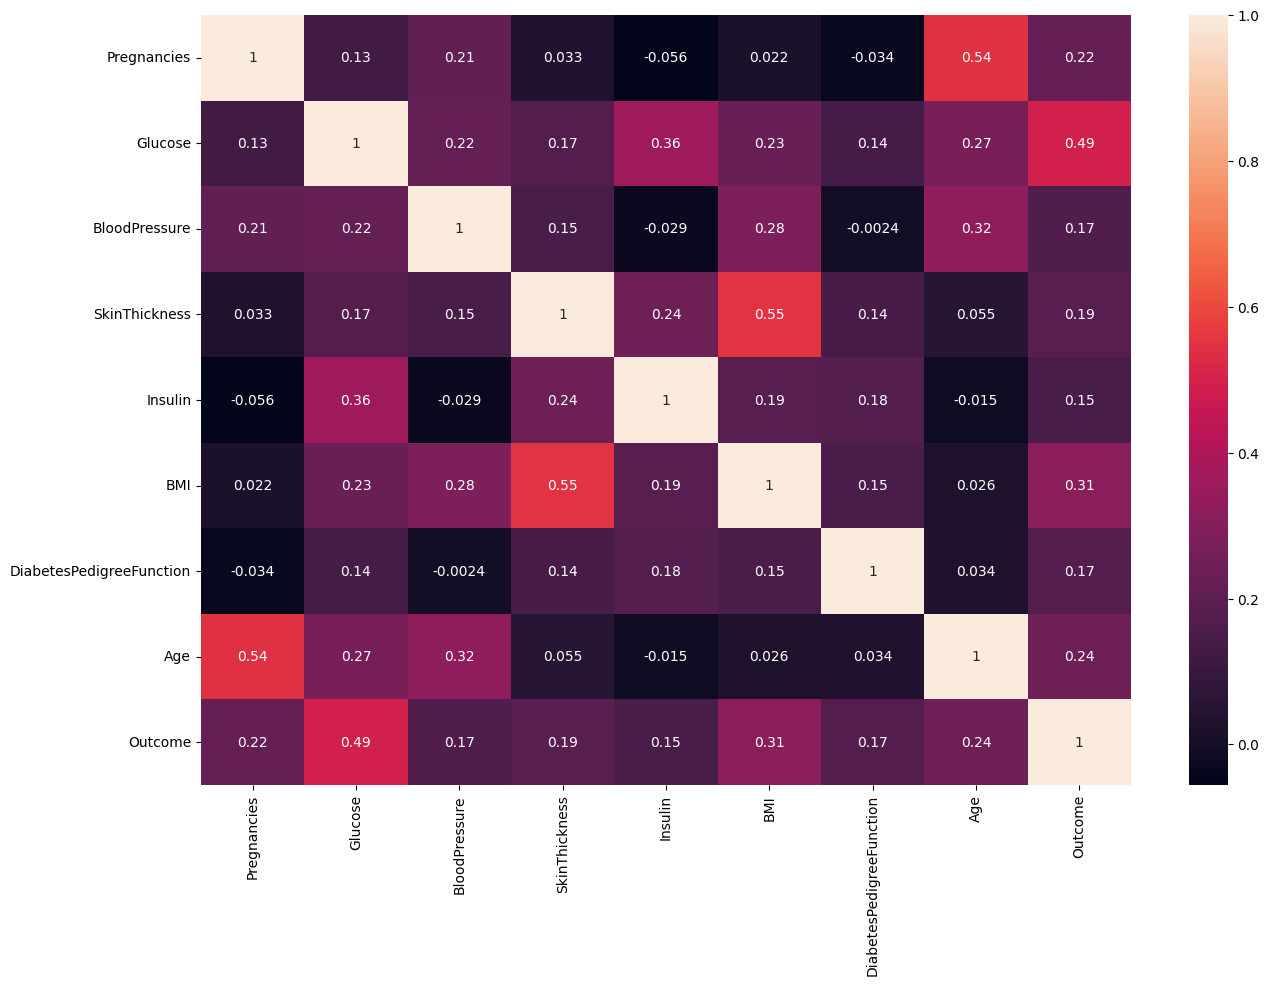

In [ ]:
cor2 = ds_fin.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
y=ds_fin['Outcome']
X= ds_fin.drop('Outcome',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', weights='distance')

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
# Making predictions on the test set
y_pred = knn.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7402597402597403
Precision: 0.64
Recall: 0.5925925925925926
F1 Score: 0.6153846153846153


In [ ]:
y.value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


# **Different settings**

In [ ]:
#setting 1:
acc1 = []
for i in range(1,21):
  knn1 = KNeighborsClassifier(n_neighbors=i, p=2, metric='manhattan', weights='distance')
  knn1.fit(X_train, y_train)
  y_pred1 = knn1.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc1.append(accuracy_score(y_test, y_pred1))
  print("Accuracy:", accuracy_score(y_test, y_pred1))

# of neigbours: 1
Accuracy: 0.7077922077922078
# of neigbours: 2
Accuracy: 0.7077922077922078
# of neigbours: 3
Accuracy: 0.7467532467532467
# of neigbours: 4
Accuracy: 0.7467532467532467
# of neigbours: 5
Accuracy: 0.7597402597402597
# of neigbours: 6
Accuracy: 0.7207792207792207
# of neigbours: 7
Accuracy: 0.7272727272727273
# of neigbours: 8
Accuracy: 0.7402597402597403
# of neigbours: 9
Accuracy: 0.7467532467532467
# of neigbours: 10
Accuracy: 0.7662337662337663
# of neigbours: 11
Accuracy: 0.7467532467532467
# of neigbours: 12
Accuracy: 0.7532467532467533
# of neigbours: 13
Accuracy: 0.7532467532467533
# of neigbours: 14
Accuracy: 0.7662337662337663
# of neigbours: 15
Accuracy: 0.7532467532467533
# of neigbours: 16
Accuracy: 0.7402597402597403
# of neigbours: 17
Accuracy: 0.7467532467532467
# of neigbours: 18
Accuracy: 0.7467532467532467
# of neigbours: 19
Accuracy: 0.7597402597402597
# of neigbours: 20
Accuracy: 0.7597402597402597


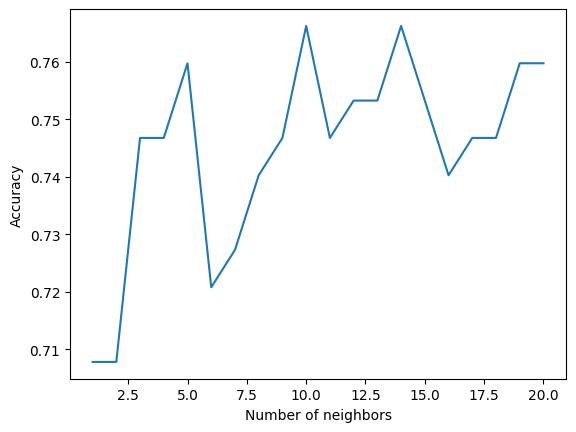

In [ ]:
plt.plot(range(1,21), acc1)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#setting 2:
acc2 = []
for i in range(1,21):
  knn2 = KNeighborsClassifier(n_neighbors=i, p=2, metric='manhattan', weights= 'uniform')
  knn2.fit(X_train, y_train)
  y_pred2 = knn2.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc2.append(accuracy_score(y_test, y_pred2))
  print("Accuracy:", accuracy_score(y_test, y_pred2))

# of neigbours: 1
Accuracy: 0.7077922077922078
# of neigbours: 2
Accuracy: 0.7207792207792207
# of neigbours: 3
Accuracy: 0.7467532467532467
# of neigbours: 4
Accuracy: 0.7532467532467533
# of neigbours: 5
Accuracy: 0.7662337662337663
# of neigbours: 6
Accuracy: 0.7272727272727273
# of neigbours: 7
Accuracy: 0.7337662337662337
# of neigbours: 8
Accuracy: 0.7402597402597403
# of neigbours: 9
Accuracy: 0.7467532467532467
# of neigbours: 10
Accuracy: 0.7467532467532467
# of neigbours: 11
Accuracy: 0.7467532467532467
# of neigbours: 12
Accuracy: 0.7467532467532467
# of neigbours: 13
Accuracy: 0.7597402597402597
# of neigbours: 14
Accuracy: 0.7662337662337663
# of neigbours: 15
Accuracy: 0.7597402597402597
# of neigbours: 16
Accuracy: 0.7467532467532467
# of neigbours: 17
Accuracy: 0.7467532467532467
# of neigbours: 18
Accuracy: 0.7467532467532467
# of neigbours: 19
Accuracy: 0.7662337662337663
# of neigbours: 20
Accuracy: 0.7597402597402597


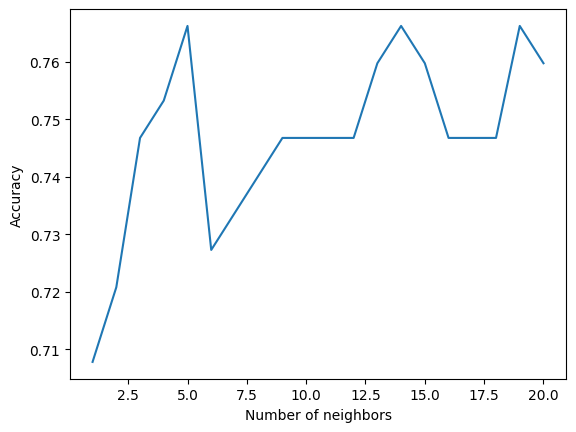

In [ ]:
plt.plot(range(1,21), acc2)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#setting 3:
acc3 = []
for i in range(1,21):
  knn3 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights= 'distance')
  knn3.fit(X_train, y_train)
  y_pred3 = knn3.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc3.append(accuracy_score(y_test, y_pred3))
  print("Accuracy:", accuracy_score(y_test, y_pred3))

# of neigbours: 1
Accuracy: 0.6883116883116883
# of neigbours: 2
Accuracy: 0.6883116883116883
# of neigbours: 3
Accuracy: 0.7142857142857143
# of neigbours: 4
Accuracy: 0.7142857142857143
# of neigbours: 5
Accuracy: 0.7402597402597403
# of neigbours: 6
Accuracy: 0.7077922077922078
# of neigbours: 7
Accuracy: 0.7272727272727273
# of neigbours: 8
Accuracy: 0.7402597402597403
# of neigbours: 9
Accuracy: 0.7597402597402597
# of neigbours: 10
Accuracy: 0.7597402597402597
# of neigbours: 11
Accuracy: 0.7727272727272727
# of neigbours: 12
Accuracy: 0.7532467532467533
# of neigbours: 13
Accuracy: 0.7727272727272727
# of neigbours: 14
Accuracy: 0.7597402597402597
# of neigbours: 15
Accuracy: 0.7597402597402597
# of neigbours: 16
Accuracy: 0.7662337662337663
# of neigbours: 17
Accuracy: 0.7532467532467533
# of neigbours: 18
Accuracy: 0.7597402597402597
# of neigbours: 19
Accuracy: 0.7662337662337663
# of neigbours: 20
Accuracy: 0.7597402597402597


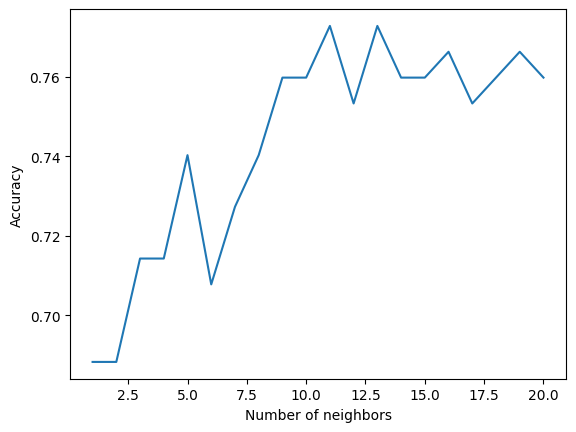

In [ ]:
plt.plot(range(1,21), acc3)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#setting 4:
acc4 = []
for i in range(1,21):
  knn4 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights= 'uniform')
  knn4.fit(X_train, y_train)
  y_pred4 = knn4.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc4.append(accuracy_score(y_test, y_pred4))
  print("Accuracy:", accuracy_score(y_test, y_pred4))

# of neigbours: 1
Accuracy: 0.6883116883116883
# of neigbours: 2
Accuracy: 0.7272727272727273
# of neigbours: 3
Accuracy: 0.7077922077922078
# of neigbours: 4
Accuracy: 0.7402597402597403
# of neigbours: 5
Accuracy: 0.7402597402597403
# of neigbours: 6
Accuracy: 0.7142857142857143
# of neigbours: 7
Accuracy: 0.7142857142857143
# of neigbours: 8
Accuracy: 0.7272727272727273
# of neigbours: 9
Accuracy: 0.7597402597402597
# of neigbours: 10
Accuracy: 0.7727272727272727
# of neigbours: 11
Accuracy: 0.7727272727272727
# of neigbours: 12
Accuracy: 0.7662337662337663
# of neigbours: 13
Accuracy: 0.7727272727272727
# of neigbours: 14
Accuracy: 0.7532467532467533
# of neigbours: 15
Accuracy: 0.7792207792207793
# of neigbours: 16
Accuracy: 0.7467532467532467
# of neigbours: 17
Accuracy: 0.7402597402597403
# of neigbours: 18
Accuracy: 0.7207792207792207
# of neigbours: 19
Accuracy: 0.7337662337662337
# of neigbours: 20
Accuracy: 0.7402597402597403


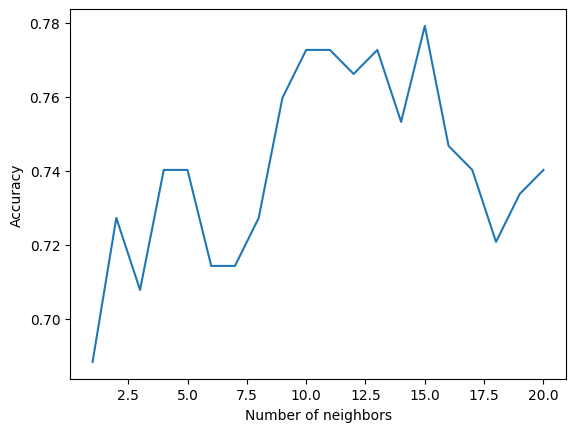

In [ ]:
plt.plot(range(1,21), acc4)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
knn_fin= KNeighborsClassifier(n_neighbors=15, p=2, metric='minkowski', weights='uniform')
knn_fin.fit(X_train, y_train)
y_pred_fin = knn_fin.predict(X_test)

# Evaluating the model
accuracy_fin = accuracy_score(y_test, y_pred_fin)
precision_fin = precision_score(y_test, y_pred_fin)
recall_fin = recall_score(y_test, y_pred_fin)
f1_fin = f1_score(y_test, y_pred_fin)

print(f"Accuracy: {accuracy_fin}")
print(f"Precision: {precision_fin}")
print(f"Recall: {recall_fin}")
print(f"F1 Score: {f1_fin}")

Accuracy: 0.7792207792207793
Precision: 0.7272727272727273
Recall: 0.5925925925925926
F1 Score: 0.6530612244897959
